In [4]:
import matplotlib.pyplot as plt
import numpy as np
import ase.db
import pandas as pd

def dbelem2array(x):
    shape, dtype, arr  = x['__ndarray__'];
    return np.array(arr, dtype=dtype).reshape(shape);    


# Connect to database
db = ase.db.connect("/Users/voicutu/Documents/GitHub/vdw_evolve/sandbox/database/c2db-20211702.db")#('c2db.db')

options = 'is_magnetic=True, thermodynamic_stability_level=3'

rows = db.select(options)
print("The number of elements is:",len(list(rows)) )

props = ["formula","spgnum", "spacegroup", "dE_zx", "dE_zy", "lam","magmom", "magstate", "doi","uid"] 
rows = db.select(options)
data = [ [ x.get(p) for p in props ] for x in rows ]
raw_df = pd.DataFrame( data, columns = props);
raw_df = raw_df[ (raw_df["spacegroup"]!='P1') & (raw_df["spacegroup"]!='Pc')& (raw_df["spacegroup"]!='P-1') ];

print( raw_df[["formula","uid"]] )

The number of elements is: 402
       formula                     uid
0       Mn2Se2     Mn2Se2-a1d595c25fc5
1        Ru2F8      Ru2F8-5b1d25d726e0
2         V2F8       V2F8-6d78fbe605b3
3     Bi2MnTe4   MnBi2Te4-a8bb2517b2b7
4      CrGa2S4    CrGa2S4-e6aae0f0d940
..         ...                     ...
394     Cr2Cl6     Cr2Cl6-9f9e75488d50
395     Pt2Cl6     Pt2Cl6-20b975a3a1e8
396    V2Br2N2    Br2N2V2-186b2da4920f
397  Mn2Cl2Se2  Cl2Mn2Se2-6bdadd86e6c4
400       VSSe       SSeV-0f3ba3ea815f

[337 rows x 2 columns]


Let's first evalute their separation in terms of spacegroup

['P-3m1' 'P-31m' 'Pmmn' 'P-6m2' 'P3m1' 'C2/m' 'P-62m' 'P-4m2' 'P4/nmm'
 'P-3' 'C2' 'P2_1/m' 'P2_1/c' 'P2/m' 'Cm' 'Pmm2' 'Pmmm' 'P2_1' 'P4/mmm'
 'Amm2' 'Pmma' 'Pmn2_1' 'P2/c' 'P321' 'Pmc2_1' 'P4/n' 'P4mm' 'Pm' 'P3']
The first 10 elements represents the  -77.74480712166172 percent


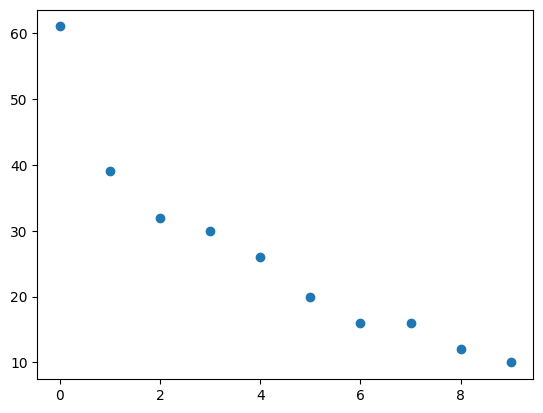

In [5]:
spacegroups = raw_df["spacegroup"].unique();
spg2idx = dict(zip(spacegroups,np.arange(len(spacegroups)) ));
indexes = np.array([spg2idx[spg] for spg in raw_df["spacegroup"] ]);
counts  = pd.cut( indexes , bins=len(spacegroups)).value_counts().values;

sarg = np.argsort(counts)[::-1]
spacegroups = spacegroups[sarg];
print(spacegroups)
indexes = indexes[sarg];
counts = counts[sarg]
plt.plot( counts[:10], 'o')

print("The first 10 elements represents the ",100*np.sum(np.sort(- counts)[:10])/ np.sum(counts), "percent" )


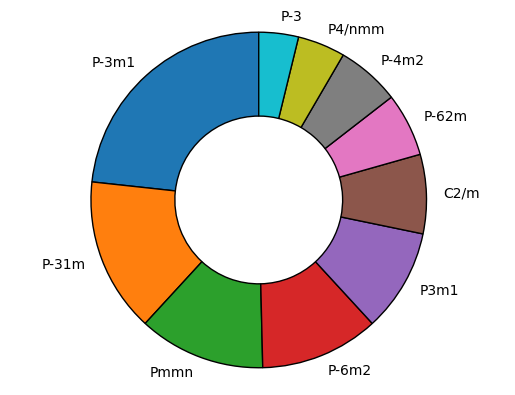

In [6]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = spacegroups[:10];
sizes = 100*counts[:10]/ np.sum(counts)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90,  wedgeprops=dict(width=0.5, edgecolor='k'),)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig= plt.gcf();
fig.savefig("pieplot.pdf")
plt.show()

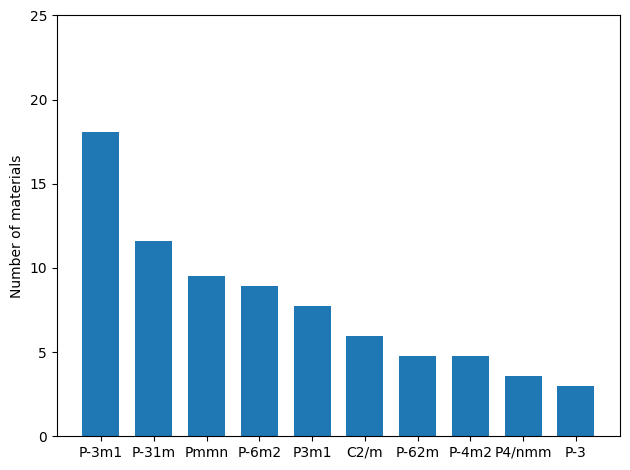

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = spacegroups[:10];
sizes = 100*counts[:10]/ np.sum(counts)

x = np.arange(len(labels))  # the label locations
width = 0.7 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , sizes, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of materials')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(0,25)


fig.tight_layout()

fig= plt.gcf();
fig.savefig("barplot.pdf")
plt.show()


In [8]:
raw_df[raw_df.spacegroup == 'P-4m2']                   

,formula,spgnum,spacegroup,dE_zx,dE_zy,lam,magmom,magstate,doi,uid
80,CoBr2,115,P-4m2,-0.068329,-0.068306,0.001689,2.999999,FM,None,CoBr2-807b6a88f950
81,MnBr2,115,P-4m2,-0.176210,-0.176171,0.005501,5.000000,FM,None,MnBr2-6e4f4724ab75
109,CoCl2,115,P-4m2,-0.145808,-0.145821,-0.004060,3.000000,FM,None,CoCl2-2f828537d676
113,NiI2,115,P-4m2,-4.912737,-4.912205,3.421658,1.773452,FM,None,NiI2-15ccde3e8d83
170,MnCl2,115,P-4m2,-0.047969,-0.047974,0.001443,5.000000,FM,None,MnCl2-8eec64049548
198,Ni2Te2,115,P-4m2,-0.471322,-0.468948,0.194427,1.034241,FM,None,Ni2Te2-725232091cb8
200,CoF2,115,P-4m2,0.395881,0.395880,-0.014265,3.000000,FM,None,CoF2-2f2f01730826
227,FeBr2,115,P-4m2,0.958399,0.958245,-0.016233,4.000000,FM,None,FeBr2-d7c6901921a7
253,FeCl2,115,P-4m2,1.401151,1.401150,0.024873,4.000000,FM,None,FeCl2-0af1baed7940
258,VO2,115,P-4m2,-0.007118,-0.007123,0.029152,0.999520,FM,None,VO2-23bb81344202


# Get the data from the database

In [12]:
import wget
import os.path


for uid in raw_df.uid:
    dataurl = 'https://cmrdb.fysik.dtu.dk/c2db/row/'+uid+'/all_data';
    file = "data/"+uid+"_data.json"
    if os.path.isfile(file):
        print("file: ",file, "found")
    else:
        print(wget.download(dataurl, out='./data'))

100% [......................................................] 7341889 / 7341889./data/Mn2Se2-a1d595c25fc5_data.json
100% [....................................................] 14917350 / 14917350./data/Ru2F8-5b1d25d726e0_data.json
100% [....................................................] 14379299 / 14379299./data/V2F8-6d78fbe605b3_data.json
100% [....................................................] 15168318 / 15168318./data/MnBi2Te4-a8bb2517b2b7_data.json
100% [......................................................] 8372311 / 8372311./data/CrGa2S4-e6aae0f0d940_data.json
100% [....................................................] 11161228 / 11161228./data/F2N3V4-3f5b11d43a1b_data.json
100% [......................................................] 8274501 / 8274501./data/N3Sc4-daf440ed0646_data.json
100% [......................................................] 9534868 / 9534868./data/FeI2-958162d78580_data.json
100% [....................................................] 13098349 / 1309

KeyboardInterrupt: 

In [13]:
import json

scell_dim= 2;
uMnSe2= 'MnSe2-f3b9f9bddf25'; uMnBi2Te4 = 'MnBi2Te4-a8bb2517b2b7';
uCrI3 = 'Cr2I6-462e253dd5f0';
uBrCrS = 'Br2Cr2S2-806bd2cbdf65';
uFeGeTe = 'GeTe2Fe3-38cc35ba8ee5';
uVSTe= 'STeV-05f16dc9de6b';
uNi2P2S6 = 'Ni2P2S6-de2432ed42aa';
uCr3Te4= 'Cr3Te4-3d365d19d9c9'
uFe2O4= "Fe2O4-3716e1d08772"
uV2Br6 = 'V2Br6-992373a7e1ea';
uCrI2 = 'CoBr2-807b6a88f950';
uFeTe2_p4 = 'Fe2Te2-b49eca087529';
uCrGeTe = 'Cr2Ge2Te6-494eb20d87cf';
uLi2Mn2P2= 'Li2Mn2P2-32e0950b0bbb';
uid = uCrI2

print(raw_df[raw_df.uid==uid])

with open('./data/'+uid+'_data.json', 'r') as file:
    for line in file:
        print("load: ",file)
        full_system_data = json.loads(line);

atoms = full_system_data['results-asr.bader.json']['kwargs']['data']['sym_a'];
a1,a2,a3     = dbelem2array( full_system_data['structure.json']['1']['cell']['array'] );
positions= dbelem2array(full_system_data['structure.json']['1']['positions'] );
positions= list(zip(atoms,positions));
sc_pos = [ [a,np.round(p + n1*a1 + n2*a2,4)] for a,p in positions for n1 in np.arange(scell_dim) for n2 in np.arange(scell_dim) ]
print("HAS INVERSION:",full_system_data['results-asr.structureinfo.json']['kwargs']['data']['has_inversion_symmetry'])

   formula  spgnum spacegroup     dE_zx     dE_zy       lam    magmom  \
80   CoBr2     115      P-4m2 -0.068329 -0.068306  0.001689  2.999999   

   magstate   doi                 uid  
80       FM  None  CoBr2-807b6a88f950  


FileNotFoundError: [Errno 2] No such file or directory: './data/CoBr2-807b6a88f950_data.json'

In [8]:
from copy import copy

toabs = np.array([a1,a2,a3]).T;
tofrac= np.linalg.inv(toabs);
sites = copy(positions);



In [14]:
eye = np.array( [[1,0,0],[0,1,0],[0,0,1]]);
I = np.array( [[-1,0,0],[0,-1,0],[0,0,-1]]);
my= np.array( [[ 1,0,0],[0,-1,0],[0,0, 1]]);
mx= np.array( [[-1,0,0],[0, 1,0],[0,0, 1]]);
mz= np.array( [[ 1,0,0],[0, 1,0],[0,0,-1]]);

def Cz(n):
    tn = 2*np.pi/n;
    return np.array( [ [np.cos(tn),-np.sin(tn),0],[np.sin(tn),np.cos(tn),0],[0,0,1]]);
def Cy(n):
    tn = 2*np.pi/n;
    return np.array( [ [np.cos(tn),0,np.sin(tn)],[0,1,0],[-np.sin(tn),0,np.cos(tn)]]);
def Cx(n):
    tn = 2*np.pi/n;
    return np.array( [ [1,0,0],[0,np.cos(tn),-np.sin(tn)],[0,np.sin(tn),np.cos(tn)]]);

inv      = ("inv", I  );
mzmy     = ("mzmy", mz.dot(my)  );
mzC2y2   = ("mzC2y", mz.dot(Cy(2))  );
mxC2x    = ("mxC2x", mx.dot(Cx(2))  );
identity = ("identity", np.array( [[ 1,0,0],[0, 1,0],[0,0, 1]]) );

sym_list = (identity,inv,mzCy2,mzmy,mxC2x);

def is_int(x):
    iterator = ();
    if isinstance(x, (int,float, complex)):
        iterator= (x,);
    else:
        try:
            iterator = iter(x);
        except:
            print("not list or primitive return false");
            return false;
    return np.all([ np.abs(x-np.round(x,0))<1e-2 for x in iterator]);

def isSymmetry( R ,sites ):
    return np.all([ np.any([(a0==a1 and  is_int(tofrac.dot(R.dot(r1)-r0)) ) for a1,r1 in sites]) for a0,r0 in sites ]);

for sym in sym_list:
    label, R = sym;
    if isSymmetry( R,sites ):
        print(label, "is a symmetry")
    else:
        print(label, "is not a symmetry")
        


NameError: name 'mzCy2' is not defined

In [ ]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = spacegroups[:10];
sizes = 100*counts[:10]/ np.sum(counts)
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, startangle=90,  wedgeprops=dict(width=0.5, edgecolor='k'),)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

fig= plt.gcf();
fig.savefig("pieplot.pdf")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

data = [225, 90, 50, 60, 100, 5]

wedges, texts = ax.pie(data,startangle=-40)

#bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
#kw = dict(arrowprops=dict(arrowstyle="-"),
#          bbox=bbox_props, zorder=0, va="center")

#for i, p in enumerate(wedges):
 #   ang = (p.theta2 - p.theta1)/2. + p.theta1
 #   y = np.sin(np.deg2rad(ang))
   # x = np.cos(np.deg2rad(ang))
 ##   horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
 #   connectionstyle = "angle,angleA=0,angleB={}".format(ang)
  #  kw["arrowprops"].update({"connectionstyle": connectionstyle})
#    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
  #              horizontalalignment=horizontalalignment, **kw)

ax.set_title("Matplotlib bakery: A donut")

plt.show()

In [ ]:

#Remove cases with no effective masses
#raw_df = raw_df[raw_df.emass_cb_dir1.notna() & raw_df.emass_cb_dir2.notna() & raw_df.emass_vb_dir1.notna() & raw_df.emass_vb_dir2.notna()]
#Remove cases with no gaps
#df = raw_df[raw_df.gap_dir.notna() | raw_df.gap_dir_hse.notna() | raw_df.gap_dir_gw.notna() ]
df["cb_ani"] = raw_df.emass_cb_dir1/raw_df.emass_cb_dir2;
df["vb_ani"] = raw_df.emass_vb_dir1/raw_df.emass_vb_dir2;

min_ani = 0.1
df = df[ df.cb_ani.apply( lambda x: np.abs(x-1.0)>min_ani ) | df.vb_ani.apply( lambda x: np.abs(x-1.0)>min_ani )]

min_gap = 100e-3;
max_gap = 400e-3;
#df = df[ ( min_gap<df.gap_dir) & (df.gap_dir<max_gap) | ( min_gap<df.gap_dir_hse) & (df.gap_dir_hse<max_gap)| ( min_gap<df.gap_dir_gw) & (df.gap_dir_gw<max_gap)]
df = df[ ( min_gap<df.gap_dir_hse) & (df.gap_dir_hse<max_gap)]

print("there are ", len(df), "left")

df

In [ ]:
import wget
for uid in df.uid:
    daturl = 'https://cmrdb.fysik.dtu.dk/c2db/row/'+uid+'/all_data';
    print(wget.download(daturl, out='./data/'))

# Plot the band structure to demonstrate the bandgap

In [ ]:
import json
import matplotlib.pyplot as plt

def plot_band_structure(uid):
    full_bandstructure_data = [];    
    with open('./data/'+uid+'_data.json', 'r') as file:
        for line in file:
            full_bandstructure_data = json.loads(line);

    bandstructure = full_bandstructure_data.get('results-asr.bandstructure.json').get('kwargs').get('data').get('bs_soc');
    EF = bandstructure.get('efermi')

    shape, dtype, data=  bandstructure.get('energies')['__ndarray__'];
    bands = np.array(data,dtype=dtype).reshape(shape)-EF;

    path = bandstructure.get('path');
    shape, dtype, data=  path.get('kpts')['__ndarray__'];
    kpoints = np.array(data,dtype=dtype).reshape(shape);

    shape, dtype, data= path.get('cell').get('array').get('__ndarray__');
    lat_vec = np.array(data,dtype=dtype).reshape(shape).T; lat_vec[2,2]=1
    rec_vec = np.linalg.inv(lat_vec).T

    ticks_labels, ticks_pos = [], [];
    for l in path.get('special_points').keys(): 
        shape, dtype, data = path.get('special_points').get(l).get('__ndarray__');
        tick_pos = np.array(data,dtype=dtype).reshape(shape);
        ticks_pos.append(tick_pos);
        ticks_labels.append(l);
    ticks_pos = [ np.argmin( np.linalg.norm(k-kpoints,axis=1)) for k in ticks_pos]

    X = np.cumsum(np.linalg.norm(np.diff(kpoints.dot(rec_vec),axis=0,prepend=0),axis=1));
    X = X/X.max();

    import matplotlib.pyplot as plt
    for Y in bands:
        plt.plot(X,Y);
    plt.ylim(-1,1);

    plt.xticks( X[ticks_pos]);
    plt.gca().set_xticklabels(ticks_labels);

In [ ]:
for f,sg,uid in zip(df.formula,df.spacegroup, df.uid):
    print(f,sg, uid)
    plot_band_structure(uid);
    plt.show();

In [ ]:
ticks_labels

In [ ]:
lat_vec

In [ ]:
import matplotlib.pyplot as plt
for Y in bands:
    plt.plot(X,Y);
plt.ylim(-1,1)

In [ ]:
 bandstructure_data.get('results-asr.bandstructure.json').get('kwargs')